In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [5]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [6]:
columns = df.columns.to_list()
#these don't need cleaning for missing values
columns.remove('PRIMARY_KEY')
columns.remove('STATE')
columns.remove('YEAR')
#not enough filled entries to make these worthwhile
columns.remove('AVG_MATH_4_SCORE')
columns.remove('AVG_MATH_8_SCORE')
columns.remove('AVG_READING_4_SCORE')
columns.remove('AVG_READING_8_SCORE')

In [7]:
#let's interpolate some data!
for column in columns:
    df[column] = df[column].interpolate()

__1. Derive the descriptive statistics of the data and discuss the points you find remarkable.__

In [11]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [9]:
df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


__2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.__

In [29]:
colorado = df.loc[df.STATE == 'COLORADO']

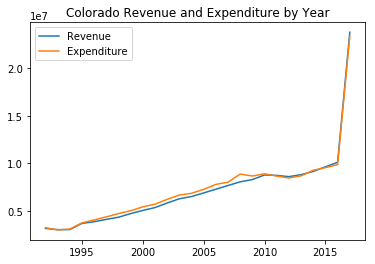

In [33]:
plt.plot(colorado.YEAR, colorado.TOTAL_REVENUE, label='Revenue')
plt.plot(colorado.YEAR, colorado.TOTAL_EXPENDITURE, label='Expenditure')
plt.legend()

plt.title('Colorado Revenue and Expenditure by Year')

plt.show()

In [34]:
colorado.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

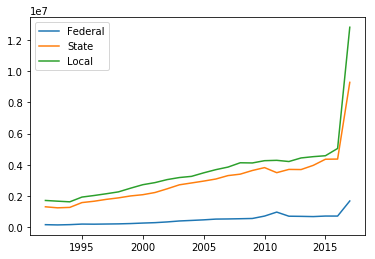

In [35]:
plt.plot(colorado.YEAR, colorado.FEDERAL_REVENUE, label='Federal')
plt.plot(colorado.YEAR, colorado.STATE_REVENUE, label='State')
plt.plot(colorado.YEAR, colorado.LOCAL_REVENUE, label='Local')


plt.legend()
plt.show()

[This](https://www.chalkbeat.org/posts/co/2017/12/19/how-colorados-school-funding-changed-in-2017/) could be it!

__3. In your chosen state, which of the lessons are the students more successful, math or reading?__

In [37]:
colorado.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [40]:
colorado[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,10.000000,10.000000,10.000000,11.000000
mean,237.826700,283.900756,223.069245,262.675502
std,8.295730,6.066345,3.629681,5.329588
min,221.023429,272.398433,213.480890,251.936881
25%,236.198806,281.467970,223.489415,259.506832
50%,240.450453,285.865972,223.696817,261.964491
75%,242.740224,287.091610,224.524520,266.324124
max,246.975708,291.742673,226.663220,270.338689


In [41]:
colorado['MATH'] = (colorado['AVG_MATH_4_SCORE'] + colorado['AVG_MATH_8_SCORE']) / 2
colorado['READING'] = (colorado['AVG_READING_4_SCORE'] + colorado['AVG_READING_8_SCORE']) / 2

In [43]:
colorado[['MATH', 'READING']].describe()

,MATH,READING
count,10.000000,10.000000
mean,260.863728,243.027936
std,7.098128,2.851203
min,246.710931,237.834767
25%,259.477351,241.576506
50%,263.335345,243.443444
75%,264.827351,244.933302
max,268.328754,247.515154


Yikes! Lots of missing values! With what we have, there are slightly higher average math scores although a higher variance. Let's see what the distribution looks like.

__4. What are the distributions of the math and reading scores in the sample?__

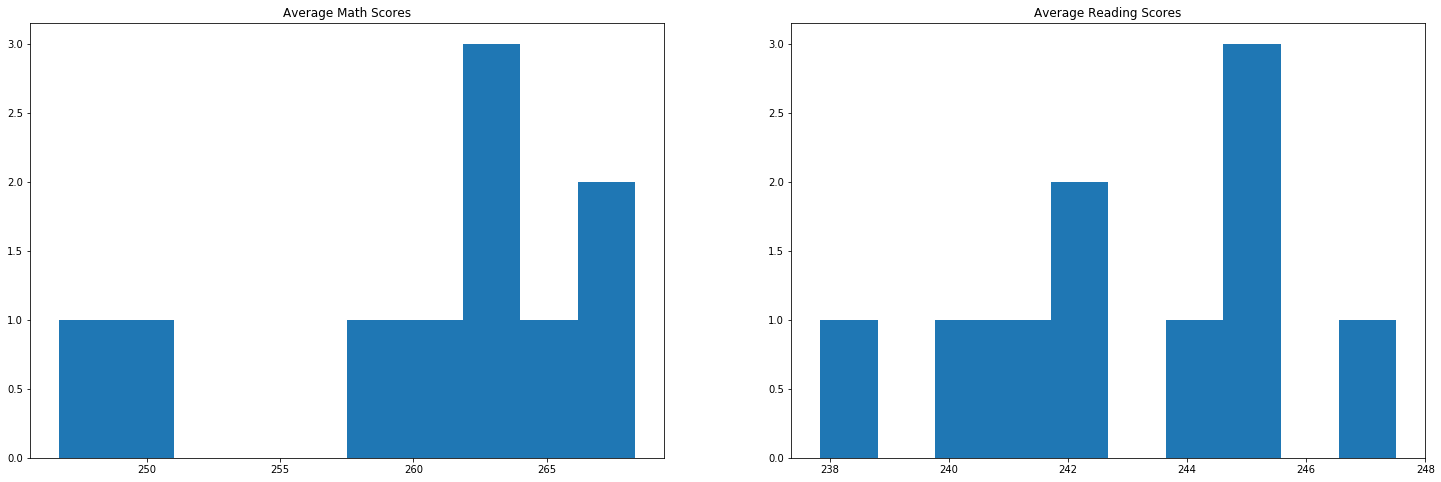

In [49]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
plt.hist(colorado.MATH)
plt.title('Average Math Scores')

plt.subplot(1, 2, 2)
plt.hist(colorado.READING)
plt.title('Average Reading Scores')

plt.show()

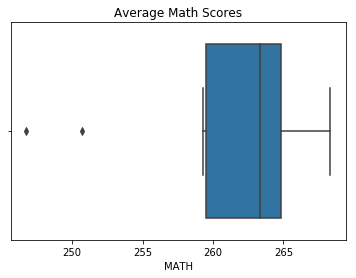

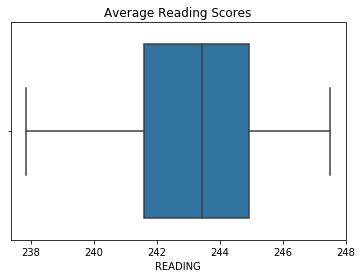

In [54]:
sns.boxplot(x=colorado.MATH)
plt.title('Average Math Scores')
plt.show()

sns.boxplot(x=colorado.READING)
plt.title('Average Reading Scores')
plt.show()

__5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.__

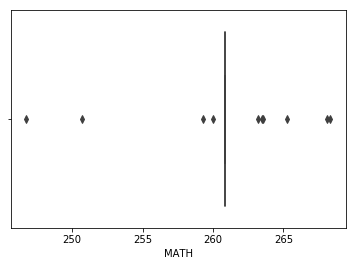

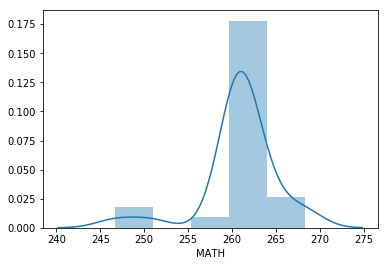

In [58]:
colorado_math_mean = colorado.MATH.fillna(colorado.MATH.mean())
colorado_reading_mean = colorado.READING.fillna(colorado.READING.mean())

sns.boxplot(x=colorado_math_mean)
plt.show()
sns.distplot(colorado_math_mean)
plt.show()

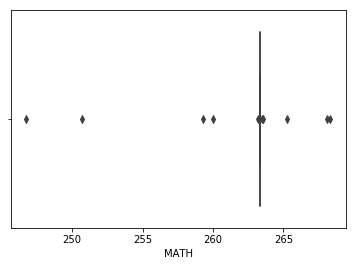

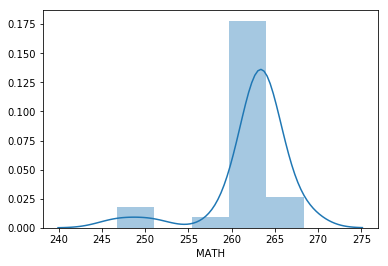

In [62]:
colorado_math_median = colorado.MATH.fillna(colorado.MATH.median())
colorado_reading_median = colorado.READING.fillna(colorado.READING.median())

sns.boxplot(x=colorado_math_median)
plt.show()
sns.distplot(colorado_math_median)
plt.show()

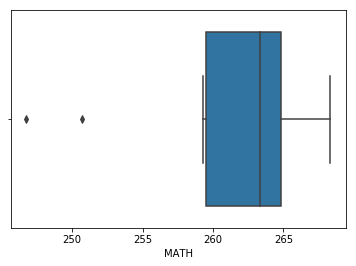

In [67]:
colorado_math_mode = colorado.MATH.fillna(colorado.MATH.mode())
colorado_reading_mode = colorado.READING.fillna(colorado.READING.mode())

sns.boxplot(x=colorado_math_mode)
plt.show()
#sns.distplot(colorado_reading_mode)
#plt.show()

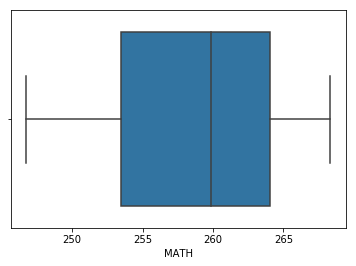

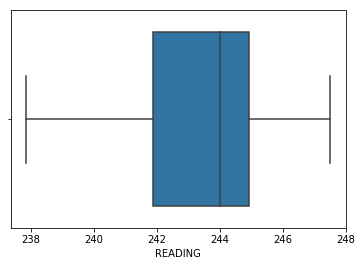

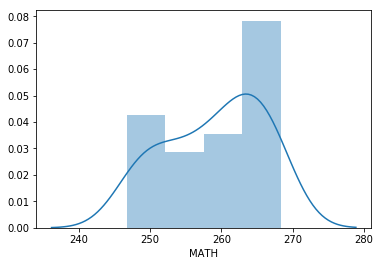

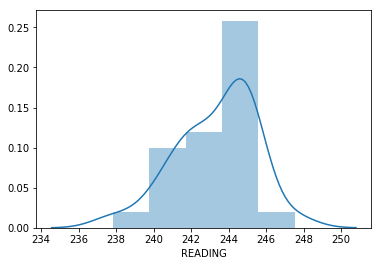

In [75]:
colorado_math_interp = colorado.MATH.interpolate()
colorado_reading_interp = colorado.READING.interpolate()

sns.boxplot(x=colorado_math_interp)
plt.show()

sns.boxplot(x=colorado_reading_interp)
plt.show()

sns.distplot(colorado_math_interp)
plt.show()

sns.distplot(colorado_reading_interp)
plt.show()

It looks like the interpolation would be most appropriate for the model preparation (at least the closest to normal).